[Titanic: Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic)

In [2]:
#グラフをnotebook内に描画させるための設定
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pandasでの表示列を増やす
# see: http://uyamazak.hatenablog.com/entry/2016/09/29/163534
pd.set_option("display.max_column", 101)

## データの確認

In [3]:
df_data = pd.read_csv("./train.csv")
display(df_data.info())
display(df_data.describe())
display(df_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 欠損値

`Age` `Cabin` `Embarked` が欠損している。

In [4]:
df_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 各変数の確認

* `Ticket` が同じなら、 `Pclass` `Fare` `Cabin` `Embarked` が同じなのでは？
  - その場合、 `Ticket` は不要なのでは？

### チケットクラス

クラスが高いほど（Pclassの値が小さいほど）、助かっている。

In [5]:
pd.pivot_table(df_data[['Pclass', 'Survived', 'PassengerId']], index='Pclass', columns='Survived', aggfunc='count')

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

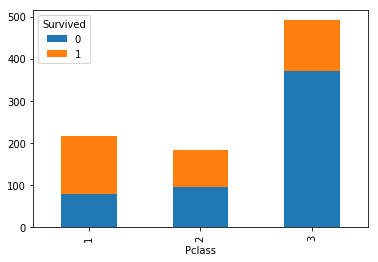

In [6]:
df_data.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count').plot.bar(stacked=True)

### 性別

女性の方が助かっている。


In [11]:
df_data.pivot_table(values='PassengerId', index='Sex', columns='Survived', aggfunc='count')

Survived,0,1
Sex,,
female,81,233
male,468,109


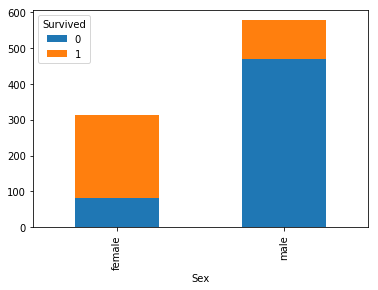

In [42]:
df_data.pivot_table(values='PassengerId', index='Sex', columns='Survived', aggfunc='count').plot.bar(stacked=True)

### 年齢

In [34]:
df_data.pivot(values='Age', columns='Survived').head()

Survived,0,1
0,22.0,NaN
1,NaN,38.0
2,NaN,26.0
3,NaN,35.0
4,35.0,NaN


Text(0.5,0,'Age')

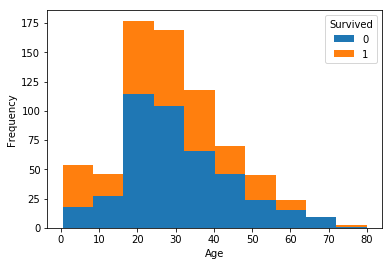

In [33]:
# DataFrame.hist と DataFrame.plot.hist は異なるらしい。
# df_data.pivot(values='Age', columns='Survived').hist(histtype='barstacked', stacked=True)
df_data.pivot(values='Age', columns='Survived').plot.hist(stacked=True)
plt.xlabel('Age')

### 配偶者・兄妹の人数

配偶者・兄妹がいる方が生存確率が高い。

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


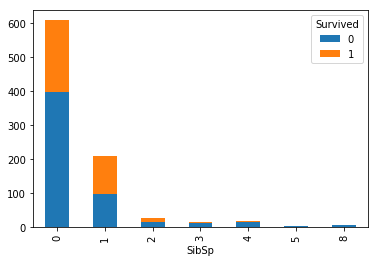

In [46]:
_temp = df_data.pivot_table(values='PassengerId', index='SibSp', columns='Survived', aggfunc='count')
display(_temp)
_temp.plot.bar(stacked=True)

### 親子の人数

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


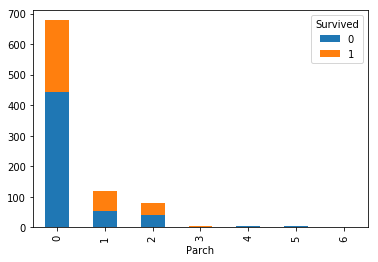

In [47]:
_temp = df_data.pivot_table(values='PassengerId', index='Parch', columns='Survived', aggfunc='count')
display(_temp)
_temp.plot.bar(stacked=True)

### チケット

In [68]:
df_data.groupby(df_data['Ticket'])[['PassengerId']].count().sort_values('PassengerId', ascending=False)

,PassengerId
Ticket,
1601,7
CA. 2343,7
347082,7
CA 2144,6
347088,6
3101295,6
S.O.C. 14879,5
382652,5
PC 17757,4


In [86]:
df_data[df_data['Ticket'].str.contains('3457')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.00,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.00,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.00,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.50,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.50,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.50,NaN,S
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.00,NaN,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.50,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S


In [109]:
df_data.groupby('Ticket')[['Pclass', 'Fare', 'Cabin', 'Embarked']].nunique()

,Pclass,Fare,Cabin,Embarked
Ticket,,,,
110152,1,1,2,1
110413,1,1,2,1
110465,1,1,2,1
110564,1,1,1,1
110813,1,1,1,1
111240,1,1,1,1
111320,1,1,1,1
111361,1,1,1,1
111369,1,1,1,1


In [112]:
df_count = df_data.groupby('Ticket')[['Pclass', 'Fare', 'Embarked']].nunique()
df_count[(df_count['Pclass'] != 1) |(df_count['Fare'] != 1) | (df_count['Embarked'] != 1) ]

,Pclass,Fare,Embarked
Ticket,,,
113572,1,1,0
113798,1,1,2
7534,1,2,1
PC 17760,1,1,2


In [116]:
df_data[df_data['Ticket'].isin(['110152', '113572', '113798', '7534', 'PC 17760'])].sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


### 運賃

`fare`

Text(0.5,0,'Fare_log')

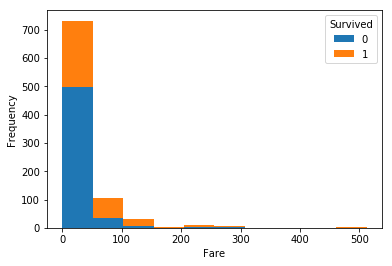

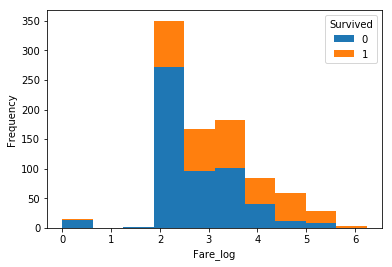

In [84]:
# DataFrame.hist と DataFrame.plot.hist は異なるらしい。
# df_data.pivot(values='Age', columns='Survived').hist(histtype='barstacked', stacked=True)
df_data.pivot(values='Fare', columns='Survived').plot.hist(stacked=True)
plt.xlabel('Fare')

df_temp = df_data.loc[:,['Fare', 'Survived']]
df_temp['Fare_log'] = np.log(df_data['Fare'] + 1)
df_temp.head()
df_temp.pivot(values='Fare_log', columns='Survived').plot.hist(stacked=True)
plt.xlabel('Fare_log')

### 船室
`cabin`

In [105]:
display(df_data[df_data['Pclass'] == 1].shape)
display(df_data[df_data['Cabin'].notnull()].shape)
display(df_data[df_data['Pclass'] == 1 & df_data['Cabin'].notnull()].shape)

# 複数条件指定の仕方に注意
# see: https://qiita.com/stokes/items/157f7ab737c5ded26832
# https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior
display(df_data[(df_data['Pclass'] != 1) & (df_data['Cabin'].notnull())].sort_values('Cabin'))
display(df_data[(df_data['Pclass'] == 1) & (df_data['Cabin'].isnull())].sort_values('Cabin'))

(216, 12)

(204, 12)

(176, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


### 乗船港

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


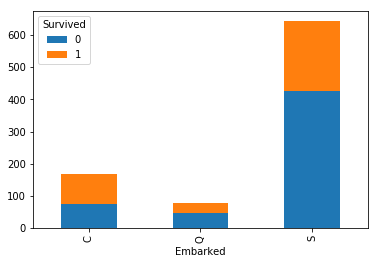

In [48]:
_temp = df_data.pivot_table(values='PassengerId', index='Embarked', columns='Survived', aggfunc='count')
display(_temp)
_temp.plot.bar(stacked=True)

#### 欠損値

In [51]:
df_data[df_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


穴埋めできないか探したが、無理そう。

In [55]:
display(df_data[df_data['Name'].str.contains('Icard')])
display(df_data[df_data['Name'].str.contains('Amelie')])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [58]:
display(df_data[df_data['Name'].str.contains('Stone')])
display(df_data[df_data['Name'].str.contains('George')])
display(df_data[df_data['Name'].str.contains('Martha')])
display(df_data[df_data['Name'].str.contains('Nelson')])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5,E34,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
120,121,0,2,"Hickman, Mr. Stanley George",male,21.00,2,0,S.O.C. 14879,73.5000,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.00,0,0,21440,8.0500,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.00,0,0,SCO/W 1585,12.2750,NaN,S
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
332,333,0,1,"Graham, Mr. George Edward",male,38.00,0,1,PC 17582,153.4625,C91,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,E50,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


## 欠損値を埋める

In [8]:
temp = df_data.pivot_table(values='Age', index='Pclass', columns=['Sex'])
display(temp)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [11]:
temp.loc[1, 'female']

34.61176470588235